## Libraries import

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# imports 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data import

In [3]:
# Impor train data
df_diamonds_train=pd.read_csv('../data/diamonds_train.csv')
df_diamonds_train.pop("Unnamed: 0") #dropped an unnecessary column

0            0
1            1
2            2
3            3
4            4
         ...  
40450    40450
40451    40451
40452    40452
40453    40453
40454    40454
Name: Unnamed: 0, Length: 40455, dtype: int64

In [4]:
df_diamonds_test=pd.read_csv('../data/diamonds_test.csv')

## Take a quick look at the Data Structure

In [5]:
# Preview the top (five) rows of the dataset
df_diamonds_train.head()

,index_id,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,Dubai
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,505,0.32,Very Good,H,VS2,Kimberly
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,2686,0.71,Fair,G,VS1,Las Vegas
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,738,0.41,Good,D,SI1,Kimberly
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,4882,1.02,Ideal,G,SI1,Dubai


In [6]:
# Preview the little information about dataset
df_diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   depth     40455 non-null  float64
 2   table     40455 non-null  float64
 3   x         40455 non-null  float64
 4   y         40455 non-null  float64
 5   z         40455 non-null  float64
 6   price     40455 non-null  int64  
 7   carat     40455 non-null  float64
 8   cut       40455 non-null  object 
 9   color     40455 non-null  object 
 10  clarity   40455 non-null  object 
 11  city      40455 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


In [7]:
# Price is int64, best if all numeric attributes have the same datatype, especially as float64
df_diamonds_train["price"] = df_diamonds_train["price"].astype(float)

There are 40455 instances in the dataset. There are also no missing instances in the dataset. That looks clean!

It's easier to work a dataset when all its attributes are numerical. The cut, color and clarity attributes are non-numeric (They are objects). We still have to convert them to be numerical.

In [8]:
# The diamond cut categories
df_diamonds_train["cut"].value_counts()

Ideal        16220
Premium      10260
Very Good     9095
Good          3663
Fair          1217
Name: cut, dtype: int64

In [9]:
df_diamonds_train["cut"].value_counts()/df_diamonds_train.shape[0]*100

Ideal        40.093932
Premium      25.361513
Very Good    22.481770
Good          9.054505
Fair          3.008281
Name: cut, dtype: float64

In [10]:
# The diamond color categories
df_diamonds_train["color"].value_counts()

G    8455
E    7325
F    7177
H    6277
D    5049
I    4032
J    2140
Name: color, dtype: int64

In [11]:
df_diamonds_train["color"].value_counts()/df_diamonds_train.shape[0]*100

G    20.899765
E    18.106538
F    17.740700
H    15.516005
D    12.480534
I     9.966630
J     5.289828
Name: color, dtype: float64

In [12]:
# The diamond clarity categories
df_diamonds_train["clarity"].value_counts()

SI1     9749
VS2     9248
SI2     6929
VS1     6066
VVS2    3799
VVS1    2774
IF      1327
I1       563
Name: clarity, dtype: int64

In [13]:
df_diamonds_train["clarity"].value_counts()/df_diamonds_train.shape[0]*100

SI1     24.098381
VS2     22.859968
SI2     17.127673
VS1     14.994438
VVS2     9.390681
VVS1     6.857002
IF       3.280188
I1       1.391670
Name: clarity, dtype: float64

In [14]:
# The diamond city categories
df_diamonds_train["city"].value_counts()

Surat            5073
Antwerp          5047
Kimberly         4976
Luxembourg       2606
Las Vegas        2586
New York City    2586
Dubai            2561
Madrid           2540
Paris            2530
Tel Aviv         2505
Zurich           2497
Amsterdam        2485
London           2463
Name: city, dtype: int64

In [15]:
df_diamonds_train["city"].value_counts()/df_diamonds_train.shape[0]*100

Surat            12.539859
Antwerp          12.475590
Kimberly         12.300087
Luxembourg        6.441725
Las Vegas         6.392288
New York City     6.392288
Dubai             6.330491
Madrid            6.278581
Paris             6.253862
Tel Aviv          6.192065
Zurich            6.172290
Amsterdam         6.142628
London            6.088246
Name: city, dtype: float64

They each don't have so many categories, but still, we will be having a much longer table (more columns). That aside for now.

In [16]:
# Summary of each numerical attribute
df_diamonds_train.describe()

,depth,table,x,y,z,price,carat
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,61.752841,57.446133,5.729392,5.732819,3.537154,3928.444469,0.797706
std,1.431725,2.233535,1.124453,1.146650,0.697062,3992.416147,0.475544
min,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000,0.200000
25%,61.000000,56.000000,4.710000,4.720000,2.910000,945.000000,0.400000
50%,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000,0.700000
75%,62.500000,59.000000,6.540000,6.540000,4.035000,5331.000000,1.040000
max,79.000000,95.000000,10.230000,58.900000,8.060000,18823.000000,4.500000


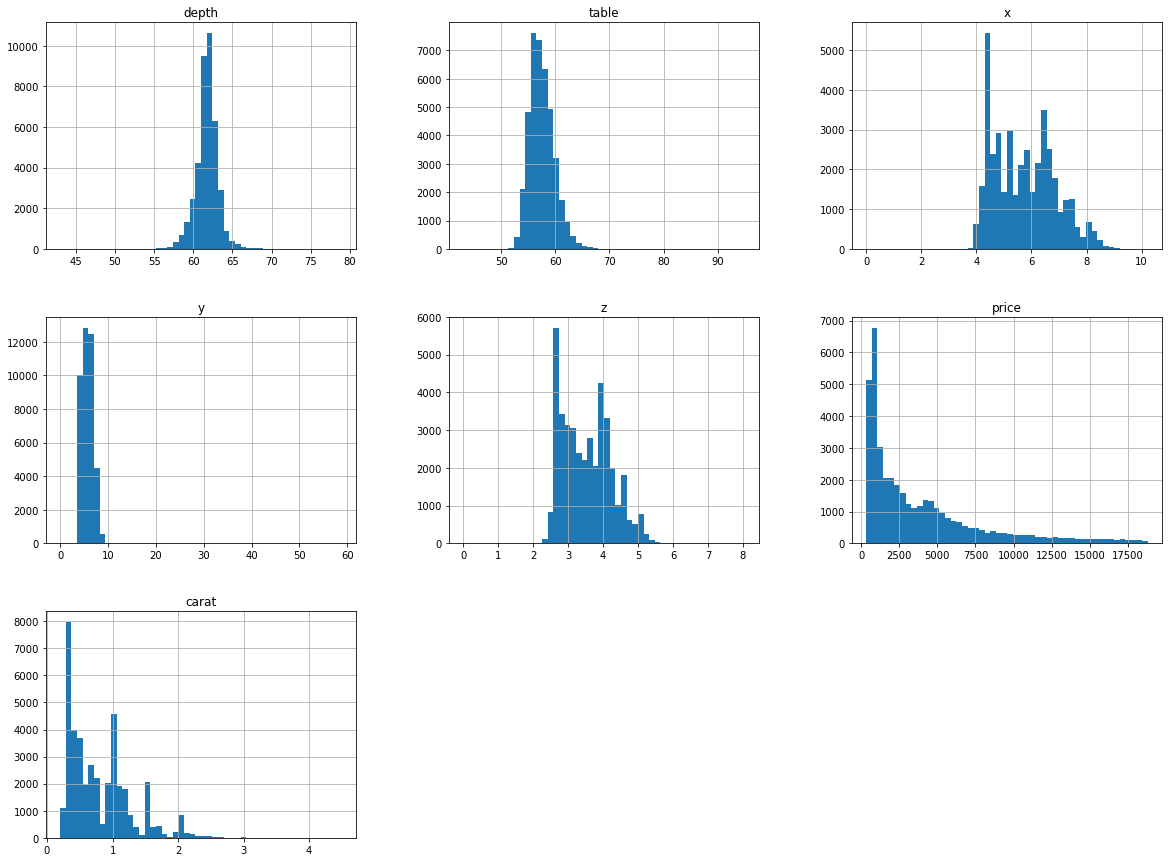

In [17]:
df_diamonds_train.hist(bins = 50, figsize = (20, 15))
plt.show()

Okay good! But what about the categorical attributes? What happens to them now? We are still going to make out a solution for them. But there's also something important we have to do and that is "Creating a Test Set".

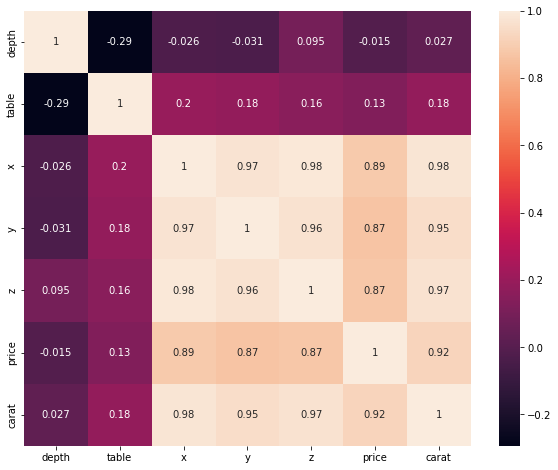

In [18]:
# Create a correlation matrix between every pair of attributes
corr_matrix = df_diamonds_train.corr()

# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

From the plot above, we could deduce that:

- x, y, z have strong correlations with price
- carat has the strongest correlation with price (0.92)
- table and depth have the weakest correlations
- It is amazing so see that carat correlates best with price. Its score is pretty high! Now we use this for our - Stratified Sampling.


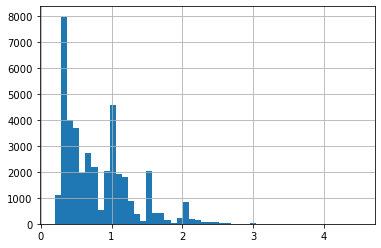

In [19]:
#Let's take a closer look at the carat's histogram.
df_diamonds_train["carat"].hist(bins = 50)
plt.show()

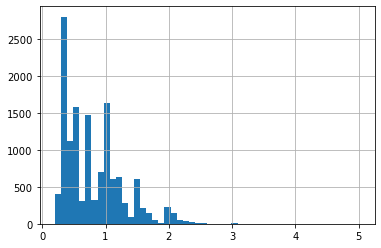

In [20]:
df_diamonds_test["carat"].hist(bins = 50)
plt.show()

Most diamonds are roughly between 0.3 and 1.5 Carats. Let's divide them into 5 categories, with those more than the 5th category merging into the 5th category.

In [21]:
# Divide the diamond carats by 0.4 to limit the number of carat categories
# Round up to have discrete categories
df_diamonds_train["carat_cat"] = np.ceil(df_diamonds_train["carat"] / 0.35)

# Merge categories > 5 in 5
df_diamonds_train["carat_cat"].where(df_diamonds_train["carat_cat"] < 5, 5.0, inplace = True)

In [22]:
# Check the distribution of the diamonds in the categories
df_diamonds_train["carat_cat"].value_counts()

2.0    12067
3.0    10000
1.0     8345
4.0     5218
5.0     4825
Name: carat_cat, dtype: int64

In [23]:
df_diamonds_train["carat_cat"].value_counts()/df_diamonds_train.shape[0]*100

2.0    29.828204
3.0    24.718823
1.0    20.627858
4.0    12.898282
5.0    11.926832
Name: carat_cat, dtype: float64

In [24]:
city

NameError: name 'city' is not defined

In [ ]:
df_diamonds_train["carat_cat"].hist()
plt.show()

In [ ]:
# Divide the diamond carats by 0.4 to limit the number of carat categories
# Round up to have discrete categories
df_diamonds_test["carat_cat"] = np.ceil(df_diamonds_test["carat"] / 0.35)

# Merge categories > 5 in 5
df_diamonds_test["carat_cat"].where(df_diamonds_test["carat_cat"] < 5, 5.0, inplace = True)

In [25]:
# Check the distribution of the diamonds in the categories
df_diamonds_test["carat_cat"].value_counts()

KeyError: 'carat_cat'

In [26]:
df_diamonds_test["carat_cat"].value_counts()/df_diamonds_test.shape[0]*100

KeyError: 'carat_cat'

In [27]:
df_diamonds_test["carat_cat"].hist()
plt.show()

KeyError: 'carat_cat'

## Data Visualization

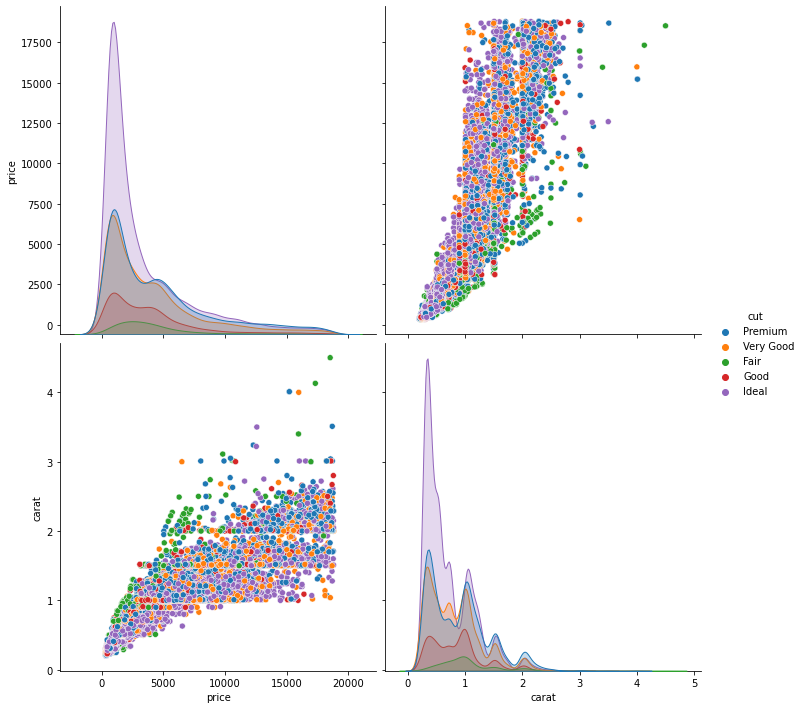

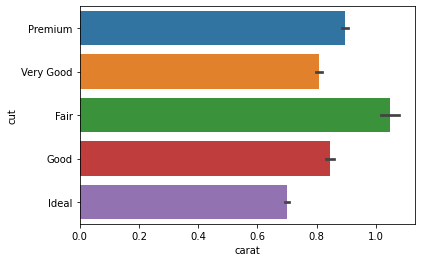

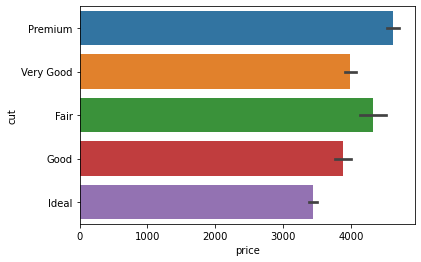

In [28]:
sns.pairplot(df_diamonds_train[["price", "carat", "cut"]], hue = "cut", height = 5)
plt.show()
sns.barplot(x = "carat", y = "cut", data = df_diamonds_train)
plt.show()
sns.barplot(x = "price", y = "cut", data = df_diamonds_train)
plt.show()

Fair cuts are most weighed, but they aren't the most expensive diamonds. Premium cuts weigh less than the fair and then cost more. Ideal cuts weigh way less and they are least expensive. The cut therefore is relatively considered while determining the price of the diamond.

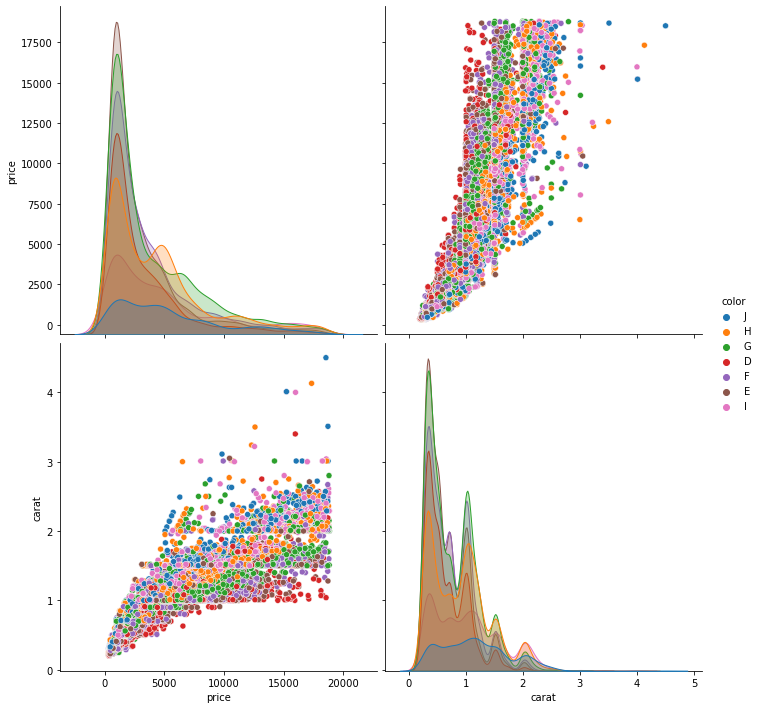

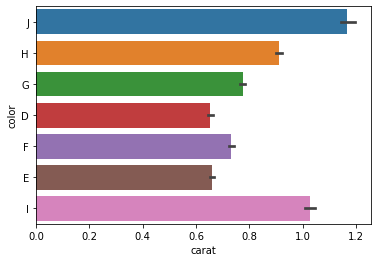

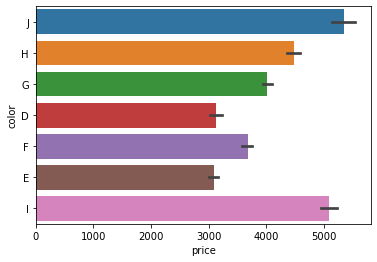

In [29]:
sns.pairplot(df_diamonds_train[["price", "carat", "color"]], hue = "color", height = 5)
plt.show()
sns.barplot(x = "carat", y = "color", data = df_diamonds_train)
plt.show()
sns.barplot(x = "price", y = "color", data = df_diamonds_train)
plt.show()

Here, we could see that the color J which is the most weighed is also the most priced. The last 2 plots are very similar. We could see here that the color of the diamond is also very dependent on its price.

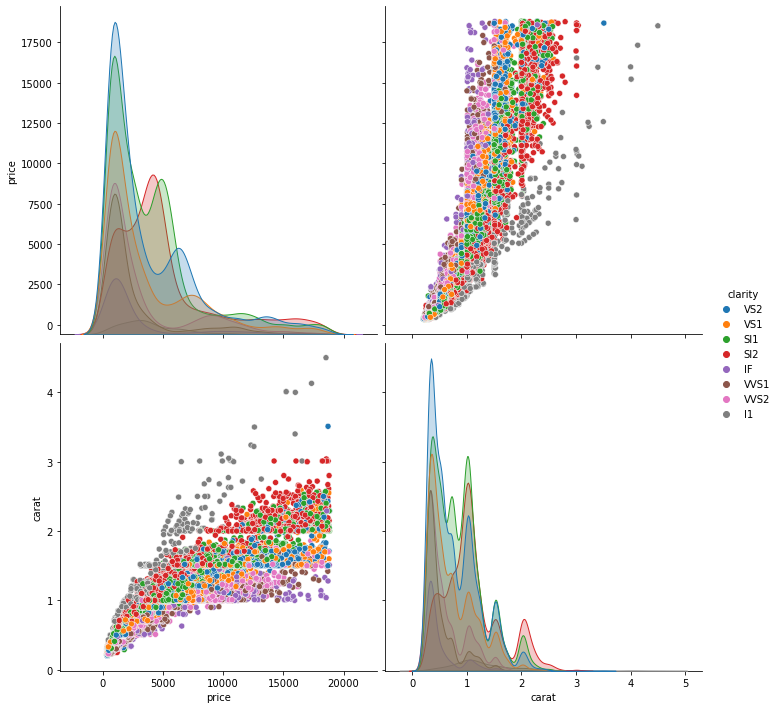

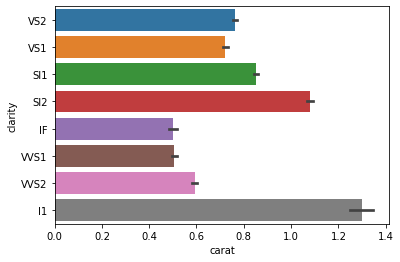

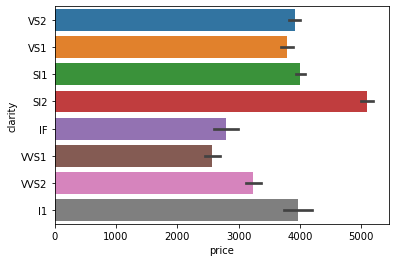

In [30]:
sns.pairplot(df_diamonds_train[["price", "carat", "clarity"]], hue = "clarity", height = 5)
plt.show()
sns.barplot(x = "carat", y = "clarity", data = df_diamonds_train)
plt.show()
sns.barplot(x = "price", y = "clarity", data = df_diamonds_train)
plt.show()

Here, we could see that I1 doesn't hold the highest clarity, even though it is the most priced. But there's something else: Apart from I1, if the rest stays, the price of a diamond could fairly be relative to its clarity, to some extent.

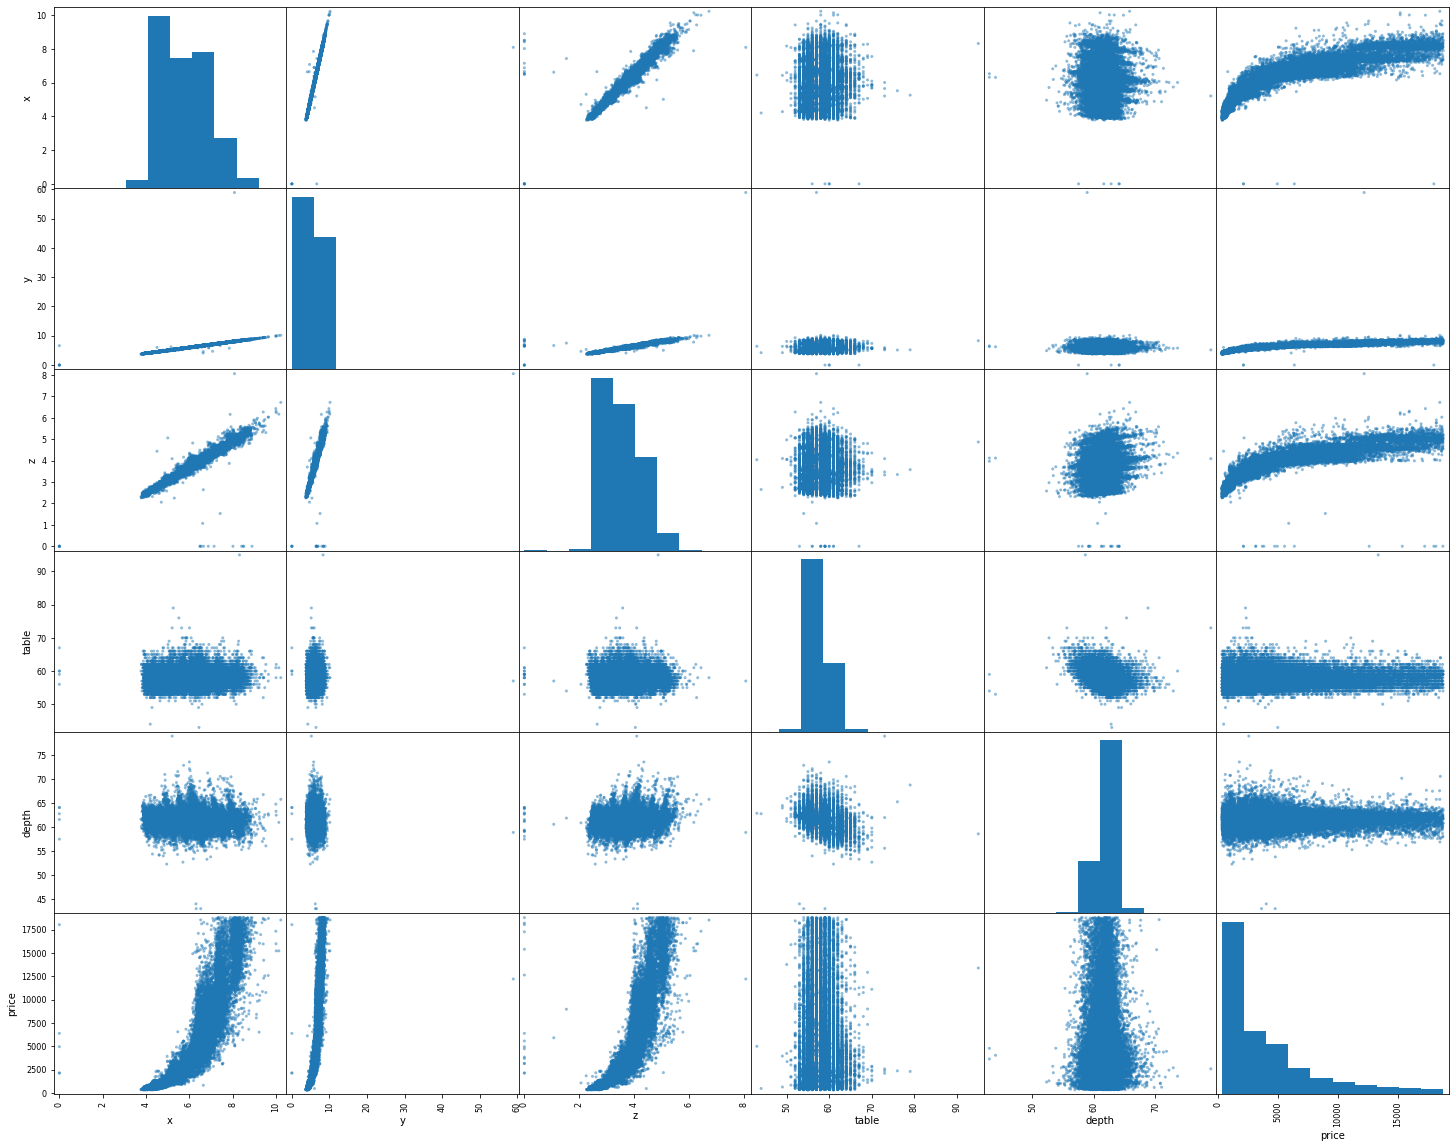

In [31]:
from pandas.plotting import scatter_matrix

attributes = ["x", "y", "z", "table", "depth", "price"]
scatter_matrix(df_diamonds_train[attributes], figsize=(25, 20))
plt.show()

These visualizations have been met by our theories during correlation. And it's very obvious here that depth and table have very weak correlation with price.

In [32]:
df_diamonds_test.min()

id                 0
carat            0.2
cut             Fair
color              D
clarity           I1
depth           50.8
table           51.0
x                0.0
y                0.0
z                0.0
city       Amsterdam
dtype: object

In [33]:
df_diamonds_test.max()

id             13484
carat           5.01
cut        Very Good
color              J
clarity         VVS2
depth           79.0
table           73.0
x              10.74
y               31.8
z               31.8
city          Zurich
dtype: object

In [34]:
df_diamonds_train.min()

index_id     0002a1cf14e9c1acaa8255fd6777d916d3aec6bc1f3c8a...
depth                                                     43.0
table                                                     43.0
x                                                          0.0
y                                                          0.0
z                                                          0.0
price                                                    326.0
carat                                                      0.2
cut                                                       Fair
color                                                        D
clarity                                                     I1
city                                                 Amsterdam
carat_cat                                                  1.0
dtype: object

In [35]:
df_diamonds_train.max()

index_id     ffff8ed56f65caf0019f90d65b7f158b862efcab5c4517...
depth                                                     79.0
table                                                     95.0
x                                                        10.23
y                                                         58.9
z                                                         8.06
price                                                  18823.0
carat                                                      4.5
cut                                                  Very Good
color                                                        J
clarity                                                   VVS2
city                                                    Zurich
carat_cat                                                  5.0
dtype: object